# Stochastic Gradient Descent

## Gradient Descent
> $x_{new} = x_{old} - \alpha \times (2x_{old})$

## Full-Batch Gradient Descent
> $\theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta_0\, \theta_1)$ <br>
> ${{\partial}J\over{\partial}{w_0}} = \frac{1}{m}\sum{({{w_1}x^{(i)}}+w_0-y^{(i)})}$ <br>
> ${{\partial}J\over{\partial}{w_1}} = \frac{1}{m}\sum{({{w_1}x^{(i)}}+w_0-y^{(i)})x^{(i)}}$

- GD는 1개의 데이터를 기준으로 미분
- 그러나 일반적으로 GD = (full) batch GD라고 가정함.
- **모든 데이터셋으로 학습함**
<br>
- 업데이트 감소 -> 계산상 효율적(속도) 가능
- 안정적인 Cost 함수 수렴
- 지역 최적화 가능 (전체 데이터에서 최적값을 찾지 못할 가능성 높음)
- 메모리 문제 (ex) 30억 개의 데이터를 한번에 업데이트하면?)
- 대규모 데이터셋에서는 모델/패러미터 업데이트가 느려짐

## Stochastic Gradient Descent
- 원래 의미는 데이터셋에서 random하게 training sample을 뽑은 후 학습할 때 사용함을 의미함.
- Data를 넣기 전에 셔플을 먼저 함
- 1개의 데이터씩 업데이트를 함.
- 그렇기 때문에 빈번한 업데이트 모델 성능 및 개선 속도 확인 가능
- 일부 문제에 대해 더 빨리 수렴 가능
- 지역 최적화 회피 가능
- 대용량 데이터 처리시 시간이 오래 걸림
- 더 이상 cost가 줄어들지 않는 시점의 발견이 어려움

## Mini-Batch (Stochastic) Gradient Descent
- 한 번에 일정량의 데이터를 랜덤하게 뽑아서 학습
- SGD와 Full-Batch GD를 혼합한 기법
- 가장 일반적으로 많이 쓰이는 기법
- Epoch & Batch-size
    - 전체 데이터가 Training 데이터에 들어갈 때 카운팅
    - Full-batch를 n번 실행하면 n epoch
    - Batch-size : 한 번에 학습되는 데이터의 개수
    - ex) 총 5,120개의 Training data에 512 batch-size면 몇 번 학습을 해야 1 epoch이 되는가? => 10번

---

# Implementation - SGD

## Mini-Batch SGD

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 


In [2]:
from sklearn.datasets._samples_generator import make_regression
X, y = make_regression(n_samples = 1000, 
                       n_features=1, 
                       noise=10,
                       random_state=42)

In [3]:
X[:10]

array([[-1.75873949],
       [ 1.03184454],
       [-0.48760622],
       [ 0.18645431],
       [ 0.72576662],
       [ 0.97255445],
       [ 0.64537595],
       [ 0.68189149],
       [-1.43014138],
       [ 1.06667469]])

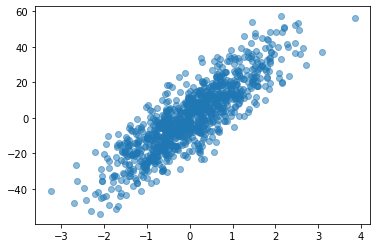

In [4]:
plt.plot(X, y, 'o', alpha = 0.5)

In [37]:
import linear_model_SGD
import imp
imp.reload(linear_model_SGD)

<module 'linear_model_SGD' from 'c:\\workspace\\TIL\\ML\\Linear_Regression\\linear_model_SGD.py'>

In [38]:
gd_lr = linear_model_SGD.LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=1, shuffle=False)
bgd_lr = linear_model_SGD.LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=len(X), shuffle=False)
sgd_lr = linear_model_SGD.LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=1, shuffle=True)
msgd_lr = linear_model_SGD.LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=100, shuffle=True) 

In [39]:
gd_lr.fit(X,y)

In [40]:
bgd_lr.fit(X,y)

In [41]:
sgd_lr.fit(X,y)

In [42]:
msgd_lr.fit(X,y)

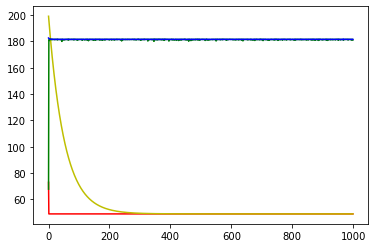

In [43]:
plt.plot(range(len(gd_lr.cost_history)), gd_lr.cost_history, c="r")
plt.plot(range(len(bgd_lr.cost_history)), bgd_lr.cost_history, c="y")
plt.plot(range(len(sgd_lr.cost_history)), sgd_lr.cost_history, c="g")
plt.plot(range(len(msgd_lr.cost_history)), msgd_lr.cost_history, c="b")


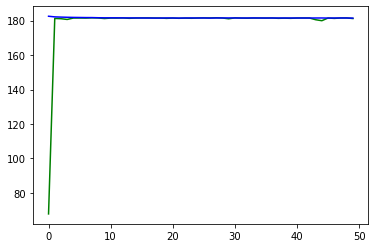

In [44]:
plt.plot(range(50), sgd_lr.cost_history[:50], c="g")
plt.plot(range(50), msgd_lr.cost_history[:50], c="b")

In [45]:
gd_lr.coef, bgd_lr.coef, sgd_lr.coef, msgd_lr.coef

(array([16.67526053]),
 array([16.6323127]),
 array([0.27397081]),
 array([0.03213005]))

### Multivariate

- 이 부분은 데이터를 구할 수가 없어서 [TEAMLAB Github](https://github.com/TeamLab/machine_learning_from_scratch_with_python)에서 다운받은 코드를 첨부한 것임.

In [ ]:
import pandas as pd

data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
import numpy as np
ad_cost = np.asarray([data['TV'].values,data['radio'].values,data['newspaper'].values]).T
sales = np.asarray(data['sales'].values)

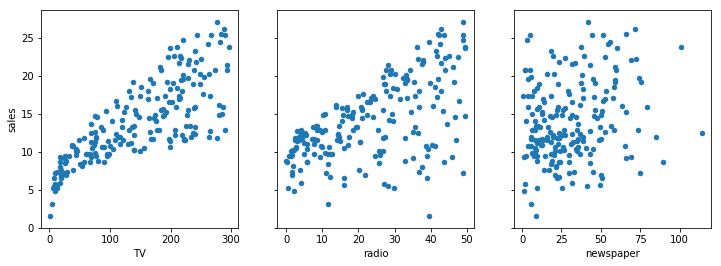

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(12, 4))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

In [ ]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(ad_cost)
y = sales
X_scaled [:5]

array([[ 0.96985227,  0.98152247,  1.77894547],
       [-1.19737623,  1.08280781,  0.66957876],
       [-1.51615499,  1.52846331,  1.78354865],
       [ 0.05204968,  1.21785493,  1.28640506],
       [ 0.3941822 , -0.84161366,  1.28180188]])

In [ ]:
gd_lr = linear_model_SGD.LinearRegressionGD(eta0=0.1, epochs=1000, batch_size=1, shuffle=False)
bgd_lr = linear_model_SGD.LinearRegressionGD(eta0=0.1, epochs=1000, batch_size=len(X_scaled), shuffle=False)
sgd_lr = linear_model_SGD.LinearRegressionGD(eta0=0.1, epochs=1000, batch_size=1, 
                                         shuffle=True, learning_rate_decay=0.9)
msgd_lr = linear_model_SGD.LinearRegressionGD(eta0=0.1, epochs=1000, batch_size=100, shuffle=True,
                                         learning_rate_decay=0.9) 

In [ ]:
gd_lr.fit(X_scaled,y)
bgd_lr.fit(X_scaled,y)
sgd_lr.fit(X_scaled,y)
msgd_lr.fit(X_scaled,y)

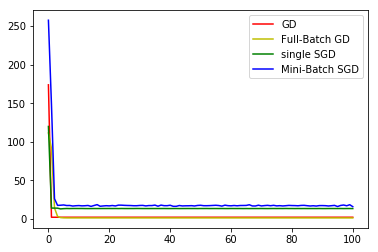

In [ ]:
plt.plot(range(len(gd_lr.cost_history)), gd_lr.cost_history, c="r", label='GD')
plt.plot(range(len(bgd_lr.cost_history)), bgd_lr.cost_history, c="y", label='Full-Batch GD')
plt.plot(range(len(sgd_lr.cost_history)), sgd_lr.cost_history, c="G", label='single SGD')
plt.plot(range(len(msgd_lr.cost_history)), msgd_lr.cost_history, c="b",label='Mini-Batch SGD')
plt.legend(loc='upper right')
plt.show()

## Learning-rate decay
- 일정한 주기로 Learning rate를 감소시키는 방법
- 특정 epoch마다 Learning rate를 감소
    ```bash
    self._eta0 = self._eta0 * self._learning_rate_decay
    ```
- Hyper parameter 설정의 어려움 존재
- 지수감소 $\alpha = \alpha_0e^{-kt}$, 1/t감소 $\alpha = \frac{\alpha_0}{(1+kt)}$
    - 여기서 $t$가 `epoch`
    - 일반적으로 지수감소 방법이 많이 사용됨

## 종료조건 설정
- SGD 과정에서 특정 값 이하로 cost function이 줄어들지 않을 경우 GD를 멈추는 방법
- 성능이 좋아지지 않는(필요 없는) 연산을 방지함
- 종료조건을 설정 : $tolerance > |{loss} - {previous\_loss}|$
- $tolerance$는 Hyper parameter로, 사람이 설정함